In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import utils

In [22]:
df= pd.read_csv('archive-3/fundamentals.csv')
split=pd.read_csv('archive-3/prices-split-adjusted.csv')
prices=pd.read_csv('archive-3/prices.csv')
sec=pd.read_csv('archive-3/securities.csv')
ab=df

In [26]:
ab.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [3]:
#checking for nan values
print("nan in split",split.isnull().sum())
print("\nnan in prices",prices.isnull().sum())
print("\nnan in sec",sec.isnull().sum())
print("\nnan in df",df.isnull().sum())

nan in split date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

nan in prices date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

nan in sec Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

nan in df Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64


In [4]:
#removing nan values
a=sec.fillna(0)
b=df.fillna(0)
print("\nnan in sec",a.isnull().sum())
print("\nnan in df",b.isnull().sum())
sec=a
df=b


nan in sec Ticker symbol              0
Security                   0
SEC filings                0
GICS Sector                0
GICS Sub Industry          0
Address of Headquarters    0
Date first added           0
CIK                        0
dtype: int64

nan in df Unnamed: 0                      0
Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 79, dtype: int64


In [5]:
#all the mean,max,min... values for sec,df,prices and split
print("securities.csv",sec.describe())
print("fundamentals.csv",df.describe())
print("prices.csv",prices.describe())
print("prices-split-adjusted.csv'",split.describe())

securities.csv                 CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06
fundamentals.csv         Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1781.000000      1.781000e+03         1.781000e+03   
mean    890.000000      4.673418e+09        -6.353484e+07   
std     514.274732      1.406047e+10         7.562794e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     445.000000      5.160000e+08        -1.040000e+08   
50%     890.000000      1.334000e+09        -1.830000e+07   
75%    1335.000000      3.246000e+09         7.816000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std             

In [6]:
l=set(df['Ticker Symbol'])
len(l)
a=[]
for i in range(0,501):
    a.append(i)
keys = l
values = a

my_dict = dict(zip(l, values))
my_dict
df['Ticker Symbol'] = df['Ticker Symbol'].map(my_dict)
print(my_dict)
print(df)

{'BDX': 0, 'QCOM': 1, 'ZBH': 2, 'AMGN': 3, 'AVY': 4, 'CPB': 5, 'COG': 6, 'CXO': 7, 'AXP': 8, 'FB': 9, 'APH': 10, 'INTU': 11, 'GWW': 12, 'VMC': 13, 'TSO': 14, 'VIAB': 15, 'MO': 16, 'COTY': 17, 'LNT': 18, 'MSFT': 19, 'CL': 20, 'BHI': 21, 'TMO': 22, 'XEC': 23, 'AYI': 24, 'PWR': 25, 'CME': 26, 'DG': 27, 'CLX': 28, 'WMT': 29, 'COST': 30, 'PNW': 31, 'CTSH': 32, 'HON': 33, 'BBY': 34, 'RSG': 35, 'EQIX': 36, 'DLTR': 37, 'SRCL': 38, 'VFC': 39, 'KEY': 40, 'PVH': 41, 'TXN': 42, 'AWK': 43, 'ADI': 44, 'CVX': 45, 'NLSN': 46, 'ROP': 47, 'COL': 48, 'DLR': 49, 'NKE': 50, 'DISCA': 51, 'UTX': 52, 'PPL': 53, 'CMA': 54, 'VTR': 55, 'FMC': 56, 'AMT': 57, 'CI': 58, 'PEP': 59, 'URBN': 60, 'AMAT': 61, 'AEE': 62, 'GRMN': 63, 'VRSK': 64, 'C': 65, 'LVLT': 66, 'BK': 67, 'HOLX': 68, 'DPS': 69, 'SLG': 70, 'IP': 71, 'WEC': 72, 'CTL': 73, 'SRE': 74, 'HP': 75, 'CERN': 76, 'CELG': 77, 'NBL': 78, 'KORS': 79, 'ABBV': 80, 'R': 81, 'EOG': 82, 'FSLR': 83, 'CHK': 84, 'STZ': 85, 'SWK': 86, 'TRIP': 87, 'NUE': 88, 'GGP': 89, 'XOM'

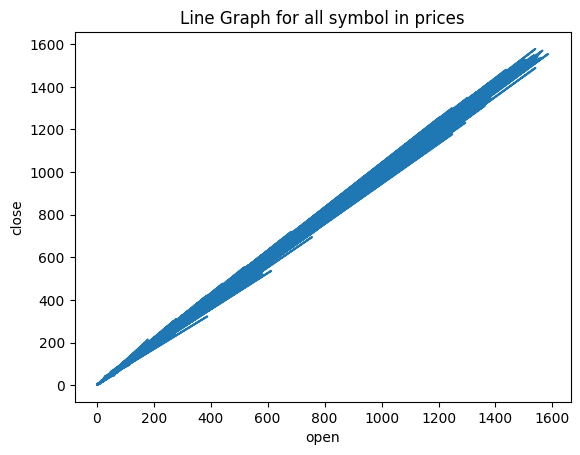

In [7]:
x=prices['open']
y=prices['close']

plt.xlabel('open')
plt.ylabel('close')
plt.title('Line Graph for all symbol in prices')
plt.plot(x, y)

plt.show()

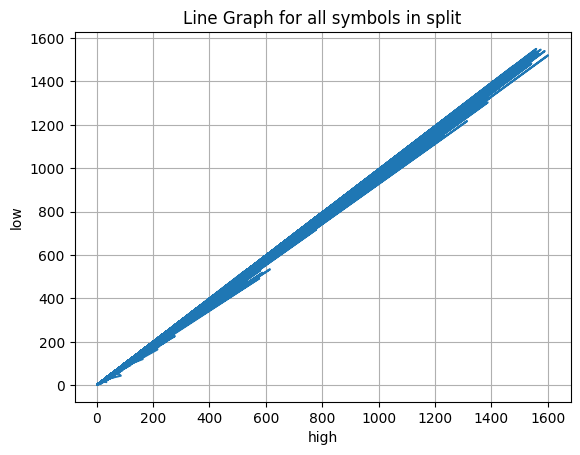

In [8]:
x =split['high']
y =split['low']

plt.plot(x, y)
plt.xlabel('high')
plt.ylabel('low')
plt.title('Line Graph for all symbols in split')
plt.grid(True)

plt.show()

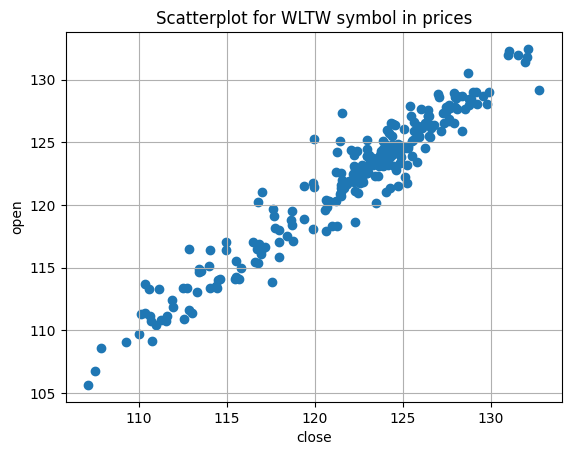

In [9]:
pr=prices
p=pr.where(pr['symbol']=='WLTW')
z=p.dropna()
x=z['close']
y=z['open']

plt.scatter(x, y)
plt.xlabel('close')
plt.ylabel('open')
plt.title('Scatterplot for WLTW symbol in prices')
plt.grid(True)

plt.show()

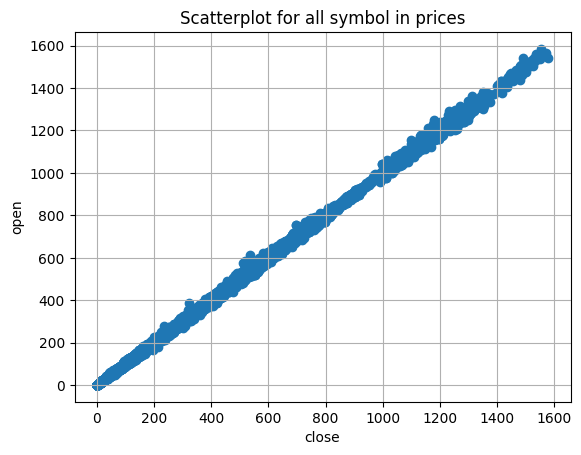

In [10]:
x = prices['close']
y = prices['open']

plt.scatter(x, y)
plt.xlabel('close')
plt.ylabel('open')
plt.title('Scatterplot for all symbol in prices')
plt.grid(True)

plt.show()

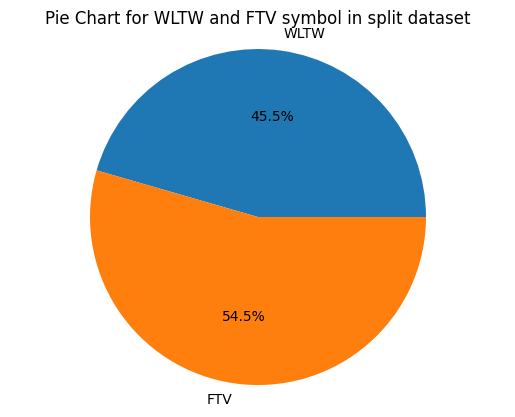

In [11]:
sp=split
s=sp.where(pr['symbol']=='WLTW')
s=s.dropna()
a=s['volume'].sum()
sp=split
s=sp.where(pr['symbol']=='FTV')
s=s.dropna()
b=s['volume'].sum()
labels =['WLTW','FTV']
sizes =[a,b]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Pie Chart for WLTW and FTV symbol in split dataset')

plt.show()

[1551182.0, 1652044.0, 1358071.0]


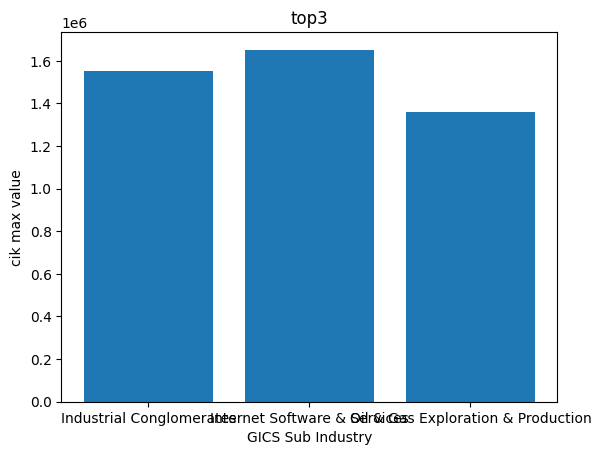

In [12]:
a=[]
b=[]
a=sec['GICS Sub Industry'].value_counts().head(3).index
for z in a:
    b.append(sec['CIK'].where(sec['GICS Sub Industry']==z).max())
print(b)

categories=a
values=b

plt.bar(categories, values)
plt.xlabel('GICS Sub Industry')
plt.ylabel('cik max value')
plt.title('top3')

plt.show()

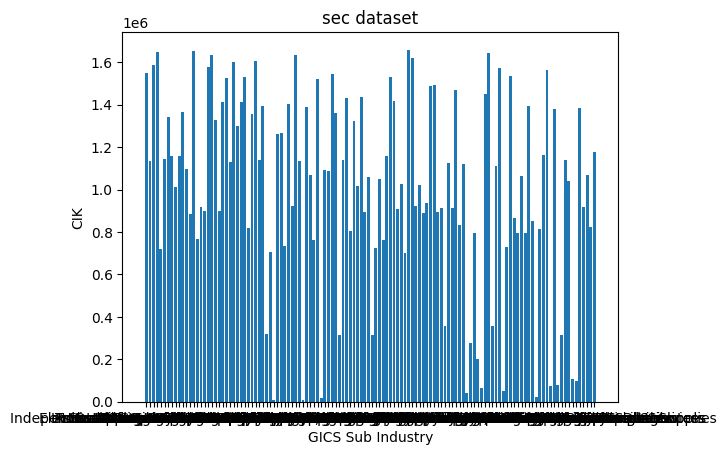

In [13]:
categories=sec['GICS Sub Industry']
values=sec['CIK']

plt.bar(categories, values)
plt.xlabel('GICS Sub Industry')
plt.ylabel('CIK')
plt.title('sec dataset')

plt.show()

In [14]:
df2=df.dropna().reset_index().drop(['index'],axis=1)
df4=df2.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding'],axis=1)
df4

,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,...,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock
0,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,1.049900e+10,...,31.0,8.0,72.0,0.0,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0
1,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,1.101900e+10,...,80.0,7.0,96.0,0.0,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0
2,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,1.562000e+10,...,159.0,7.0,80.0,0.0,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0
3,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6.000000e+06,1.109600e+10,...,82.0,19.0,67.0,0.0,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0
4,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7.000000e+03,3.106967e+09,...,52.0,6.0,34.0,0.0,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,0.0,1.576313e+10,0.0,4.766731e+09,4.934400e+07,...,6.0,14.0,0.0,0.0,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0
1777,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5.000000e+06,1.669000e+09,...,73.0,11.0,146.0,399000000.0,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0
1778,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5.000000e+06,1.717000e+09,...,63.0,12.0,200.0,396000000.0,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0
1779,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,1.154000e+09,-262000000.0,5.000000e+06,1.738000e+09,...,51.0,7.0,133.0,364000000.0,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0


<Axes: >

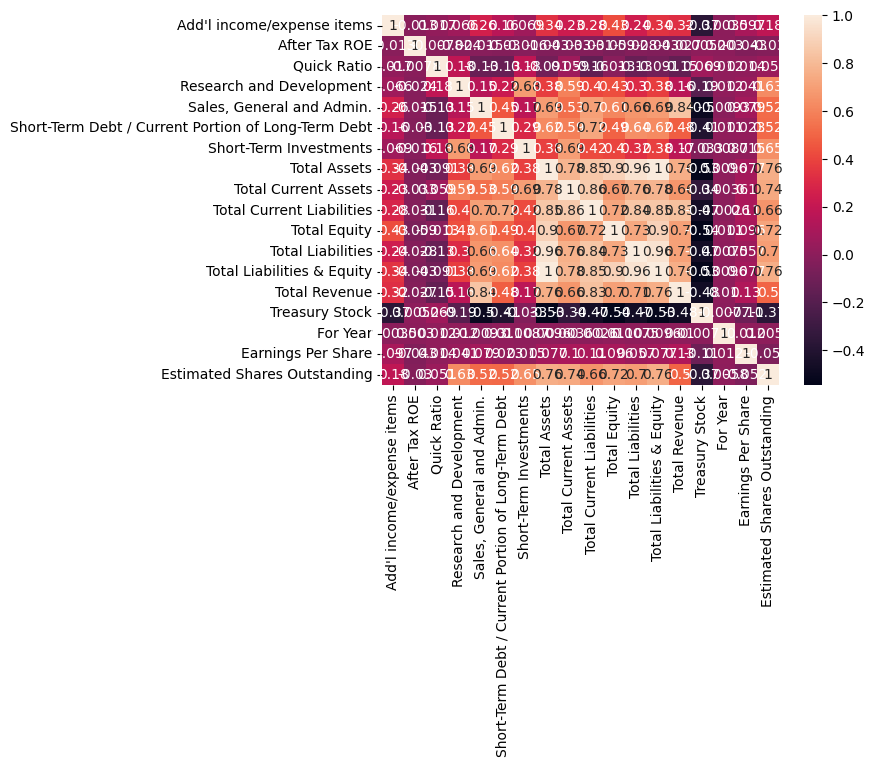

In [30]:
ab=df.dropna().reset_index().drop(['index'],axis=1)
bc=ab.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock'],axis=1)
Var_Corr = bc.corr()

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [15]:
X=df2.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding'],axis=1)

y = df2['Sale and Purchase of Stock']#Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

clf = SVC(kernel='poly')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 6.70391061452514


In [19]:
X=df4
y=df2['Sale and Purchase of Stock']#Target variable

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1424, 59) (357, 59)
(1424,) (357,)


In [20]:
model = LinearRegression().fit(X_train, y_train)
print("Linear Regression accuracy: ", model.score(X_test, y_test)*100)

Linear Regression accuracy:  94.02401736289373


In [21]:
#linear regression works better than svm as the dataset is linear it also works better because there are fewer outliers